# __가속도 데이터를 이용한 사람의 행동 예측하기__

<img src="https://miro.medium.com/max/2000/1*vjMyFvefRQbLix7WAyQA1w.png">
source = “Deep Neural Network Example” by Nils Ackermann is licensed under Creative Commons CC BY-ND 4.0

데이터 출처: http://www.cis.fordham.edu/wisdm/dataset.php

The WISDM 는 6개의 라벨을 가지고 있음(Downstairs, Jogging, Sitting, Standing, Upstairs, Walking). 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

## __데이터 전처리__

In [26]:
#파일 불러오기
data = []
with open('acc_data.txt', 'r') as f:
    data = f.readlines()

for i in range(len(data)):
    data[i] = data[i].split(',')[:-1]
    
data[:5]

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164']]

In [27]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
df = pd.DataFrame(data=data, columns=columns)

In [28]:
df.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [29]:
df.shape #데이터의 행은 350개

(343098, 6)

In [30]:
df['x'] = df['x'].astype('float64')
df['y'] = df['y'].astype('float64')
df['z'] = df['z'].astype('float64')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343098 entries, 0 to 343097
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343098 non-null  object 
 1   activity  343098 non-null  object 
 2   time      343097 non-null  object 
 3   x         343097 non-null  float64
 4   y         343097 non-null  float64
 5   z         343097 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [32]:
df = df.drop(['user', 'time'], axis=1).copy()

## __데이터 확인해보기__

In [33]:
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [34]:
df['activity'].value_counts()

Walking       137057
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [35]:
indexes = df['activity'].value_counts().index
indexes

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

In [36]:
min_val = min(df['activity'].value_counts())
balanced_data = []
for index in indexes:
    a = df[df['activity']==index].head(min_val).copy()
    balanced_data.append(a)

In [37]:
len(balanced_data)

6

In [38]:
tmp = pd.DataFrame()
tmp = tmp.append(balanced_data)
tmp['activity'].value_counts()
balanced_data = tmp

## __데이터 Label 변환하기__

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [41]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

## __Vector Magnitude__

In [42]:
def get_vector_magnitude(x,y,z):
    return np.sqrt(x**2 + y**2 + z**2)

In [43]:
x,y,z = 3,4,5
get_vector_magnitude(x,y,z)

7.0710678118654755

## __데이터 표준화(Standarization)__ 

In [44]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [45]:
scaled_X = pd.DataFrame(data=X, columns=['x','y','z'])
scaled_X['label'] = y.values

In [46]:
scaled_X

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


## __데이터 프레임 준비하기__

In [59]:
import scipy.stats as stats

In [79]:
Fs = 20
frame_size = Fs*20
step_size = Fs*2

In [80]:
def get_frames(df, frame_size, step_size):
    N_Features = 3 #x,y,z
    
    frames = []
    labels = []
    for i in range(0, len(df)-frame_size, hop_size):
        x = df['x'].values[i:i+frame_size]
        y = df['y'].values[i:i+frame_size]
        z = df['z'].values[i:i+frame_size]
        
        label = stats.mode(df['label'][i:i+frame_size])[0][0]
        frames.append([x,y,z])
        labels.append(label)
    frames = np.asarray(frames).reshape(-1, frame_size, N_Features)
    labels = np.asarray(labels)
    
    return frames, labels
    

In [81]:
X, y = get_frames(scaled_X, frame_size, step_size)

In [63]:
X.shape, y.shape

((524, 400, 3), (524,))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [65]:
X_train.shape, X_test.shape

((419, 400, 3), (105, 400, 3))

In [66]:
X_train[0].shape, X_test[0].shape

((400, 3), (400, 3))

In [67]:
X_train = X_train.reshape(-1, frame_size, 3, 1)
X_test = X_test.reshape(-1, frame_size, 3, 1)

In [68]:
X_train[0].shape, X_test[0].shape

((400, 3, 1), (400, 3, 1))

## __2D CNN 모델 적용해보기__

In [69]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, Adagrad, SGD, RMSprop
print(tf.__version__)

2.3.0


In [70]:
model = Sequential()

model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))


In [71]:
model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [72]:
epochs = 20

In [73]:
history = model.fit(X_train, y_train, epochs = epochs, validation_data= (X_test, y_test), verbose=1)

Epoch 1/20
14/14 [==============================] - 0s 23ms/step - loss: 2.0085 - accuracy: 0.2912 - val_loss: 1.2055 - val_accuracy: 0.5429
Epoch 2/20
14/14 [==============================] - 0s 12ms/step - loss: 1.1092 - accuracy: 0.4916 - val_loss: 0.7298 - val_accuracy: 0.7429
Epoch 3/20
14/14 [==============================] - 0s 13ms/step - loss: 0.8637 - accuracy: 0.6635 - val_loss: 0.6084 - val_accuracy: 0.7810
Epoch 4/20
14/14 [==============================] - 0s 12ms/step - loss: 0.7913 - accuracy: 0.6826 - val_loss: 0.4221 - val_accuracy: 0.8381
Epoch 5/20
14/14 [==============================] - 0s 12ms/step - loss: 0.5357 - accuracy: 0.7661 - val_loss: 0.3021 - val_accuracy: 0.9048
Epoch 6/20
14/14 [==============================] - 0s 12ms/step - loss: 0.3785 - accuracy: 0.8520 - val_loss: 0.1780 - val_accuracy: 0.9429
Epoch 7/20
14/14 [==============================] - 0s 12ms/step - loss: 0.3399 - accuracy: 0.8449 - val_loss: 0.1301 - val_accuracy: 0.9619
Epoch 8/20
14

In [74]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

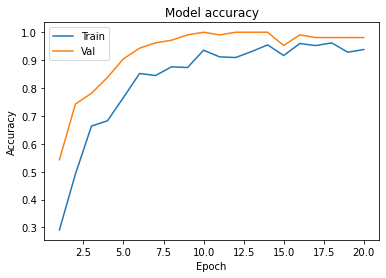

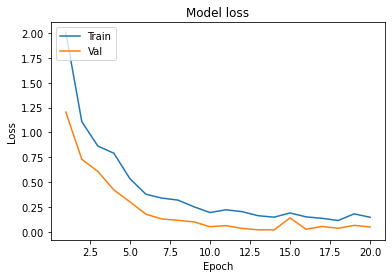

In [75]:
plot_learningCurve(history, epochs)

## __오차행렬 확인하기__

In [76]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [77]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

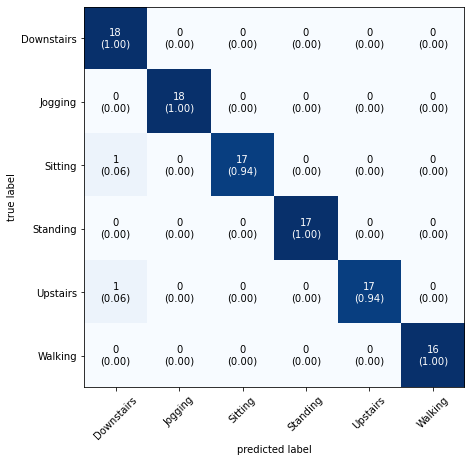

In [78]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))